In [22]:
import os,sys
import cv2
from tqdm import tqdm

import pandas as pd
import numpy as np

import matplotlib.pyplot as plt



In [19]:
path = '/Users/faskerrr/code/Faskerrr/Doggos-101/cropped/train/n02097298-Scotch_terrier/'
paths = os.listdir(path)
paths

['n02097298_9217.jpg',
 'n02097298_825.jpg',
 'n02097298_6681.jpg',
 'n02097298_8322.jpg',
 'n02097298_7629.jpg',
 'n02097298_2976.jpg',
 'n02097298_4485.jpg',
 'n02097298_12001.jpg',
 'n02097298_6863.jpg',
 'n02097298_3516.jpg',
 'n02097298_2998.jpg',
 'n02097298_200.jpg',
 'n02097298_4872.jpg',
 'n02097298_8046.jpg',
 'n02097298_759.jpg',
 'n02097298_7639.jpg',
 'n02097298_8278.jpg',
 'n02097298_2184.jpg',
 'n02097298_2609.jpg',
 'n02097298_161.jpg',
 'n02097298_6732.jpg',
 'n02097298_7835.jpg',
 'n02097298_809.jpg',
 'n02097298_8858.jpg',
 'n02097298_4092.jpg',
 'n02097298_2420.jpg',
 'n02097298_7517.jpg',
 'n02097298_8432.jpg',
 'n02097298_7932.jpg',
 'n02097298_8552.jpg',
 'n02097298_3611.jpg',
 'n02097298_9499.jpg',
 'n02097298_6740.jpg',
 'n02097298_1007.jpg',
 'n02097298_2863.jpg',
 'n02097298_12063.jpg',
 'n02097298_6781.jpg',
 'n02097298_5074.jpg',
 'n02097298_2492.jpg',
 'n02097298_8178.jpg',
 'n02097298_14007.jpg',
 'n02097298_1941.jpg',
 'n02097298_9677.jpg',
 'n02097298_2

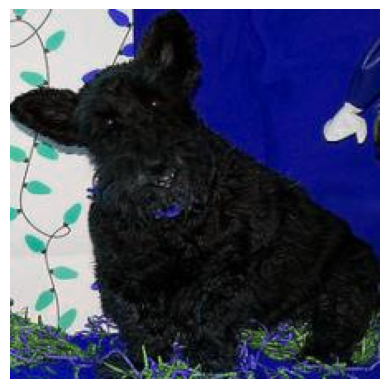

In [21]:
plt.axis('off')
for i in range(0, 100, 10):
    pic = cv2.imread(path + paths[i])
    plt.imshow(pic)
# pic = cv2.imread(path + 'n02097298_9217.jpg')
# print(pic.shape)
# plt.imshow(pic)
